# Pokemon 데이터 분석

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

In [7]:
data = pd.read_csv ('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
g = nx.Graph()
g = nx.from_pandas_edgelist ( data , source = 'Name' , target = 'Type 1' )
print(nx.info(g))

Graph with 818 nodes and 800 edges


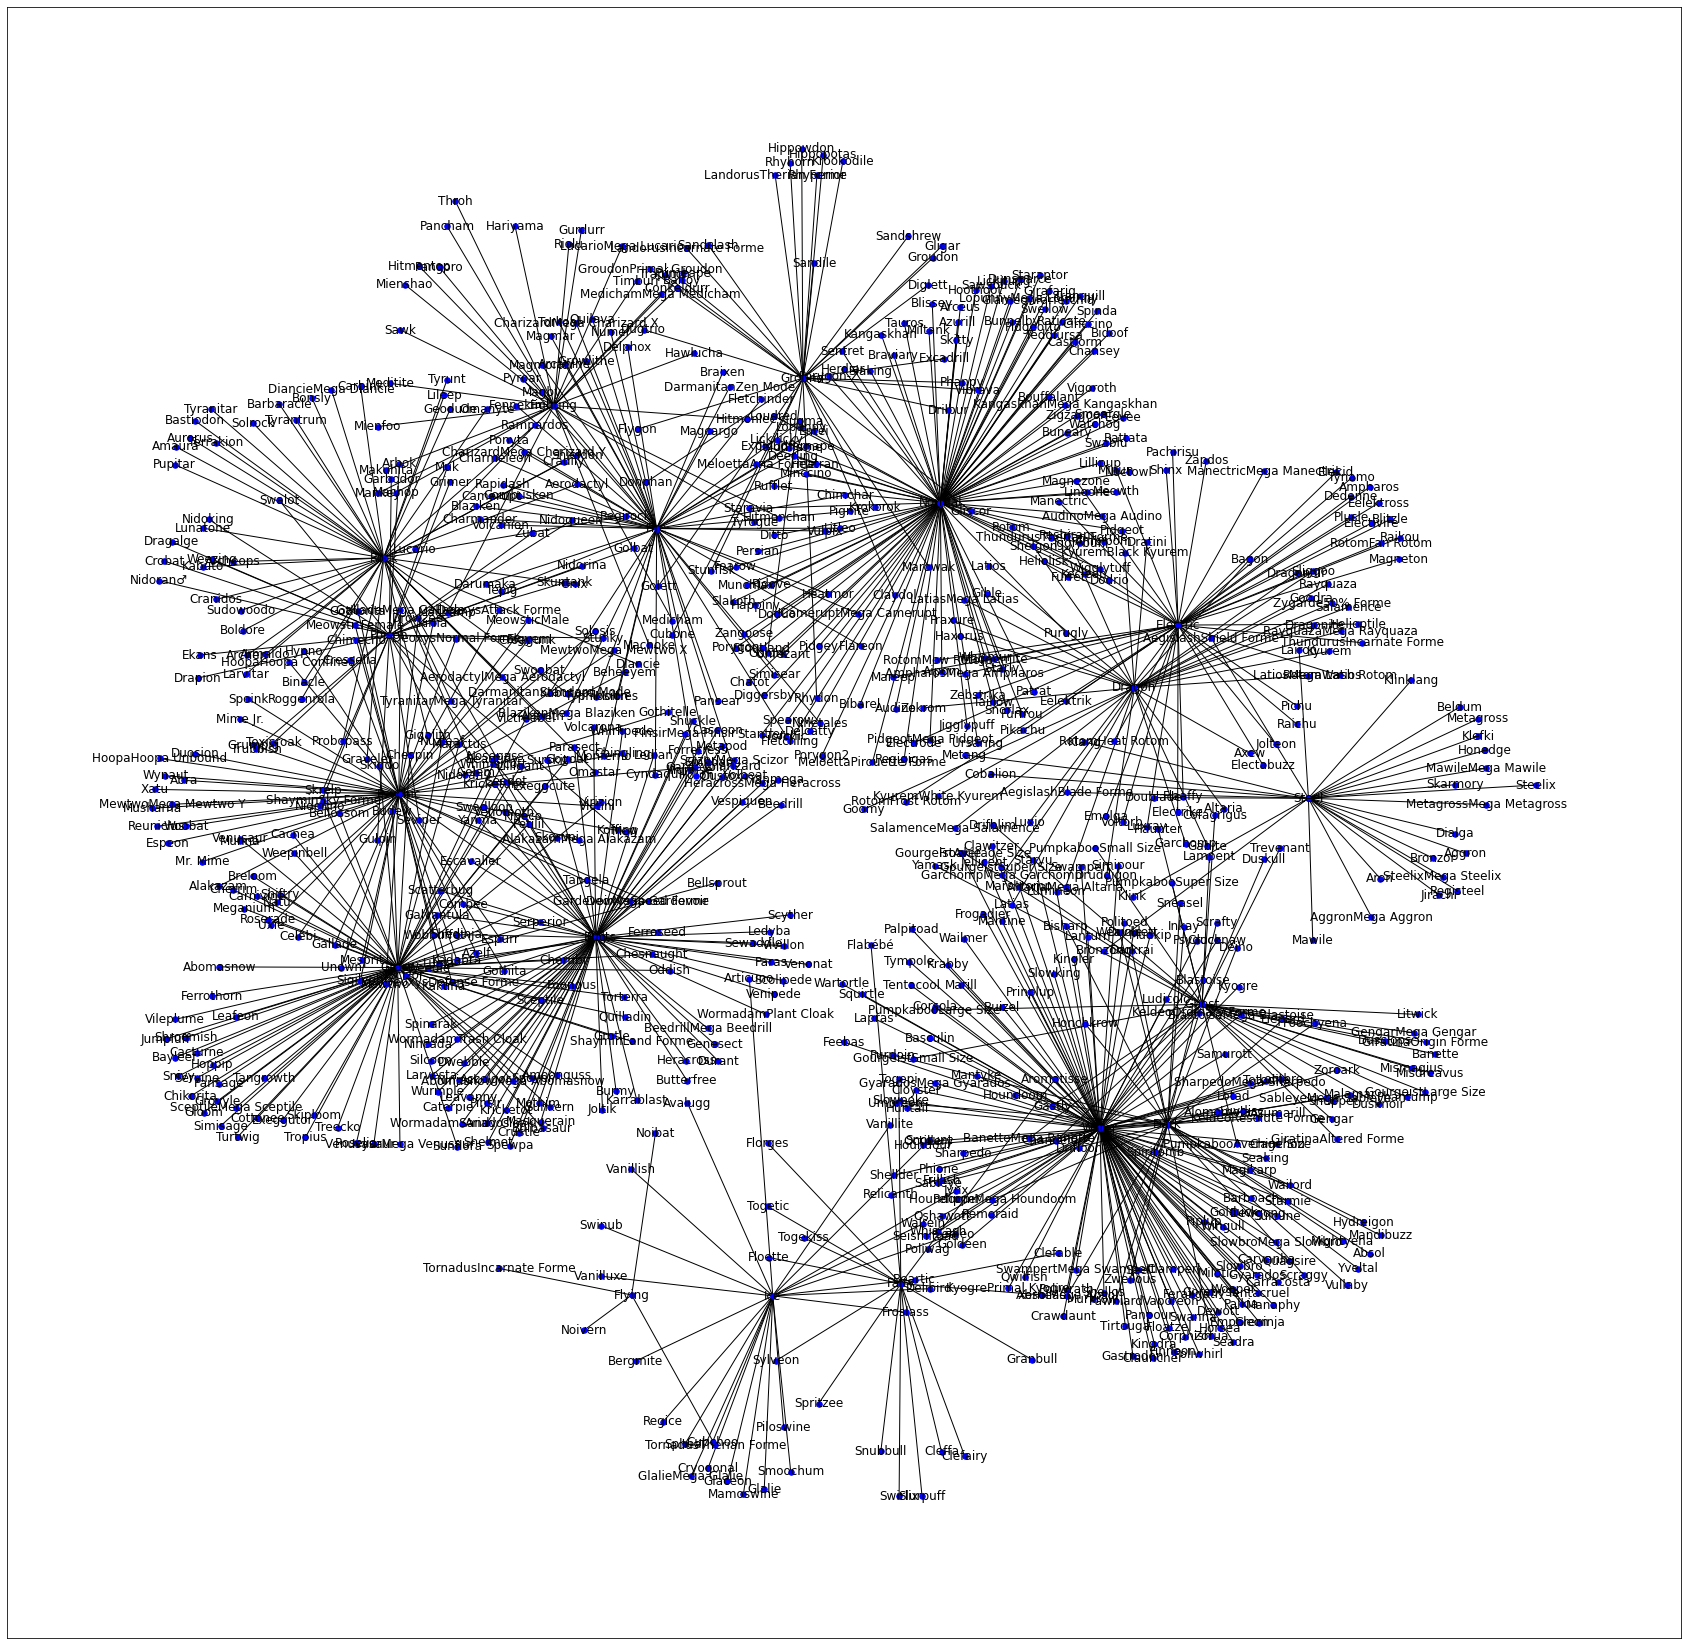

In [9]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g, pos, node_size = 30, node_color = 'blue')
plt.show()

# 왕좌의 게임 등장인물 관계망 분석

In [12]:
df=pd.read_csv("asoiaf-all-edges.csv")
df

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [14]:
G=nx.from_pandas_edgelist(df,source='Source',target='Target')

print(len(G.nodes()))
print(len(G.edges()))

796
2823


In [15]:
deg_cen=nx.degree_centrality(G)

In [16]:
deg_cen

{'Addam-Marbrand': 0.01509433962264151,
 'Brynden-Tully': 0.023899371069182388,
 'Cersei-Lannister': 0.1220125786163522,
 'Gyles-Rosby': 0.022641509433962263,
 'Jaime-Lannister': 0.1270440251572327,
 'Jalabhar-Xho': 0.006289308176100628,
 'Joffrey-Baratheon': 0.08679245283018867,
 'Kevan-Lannister': 0.021383647798742137,
 'Lyle-Crakehall': 0.006289308176100628,
 'Oberyn-Martell': 0.025157232704402514,
 'Tyrion-Lannister': 0.15345911949685534,
 'Tywin-Lannister': 0.06037735849056604,
 'Varys': 0.042767295597484274,
 'Aegon-Frey-(son-of-Stevron)': 0.005031446540880503,
 'Catelyn-Stark': 0.09433962264150943,
 'Robb-Stark': 0.0930817610062893,
 'Stevron-Frey': 0.006289308176100628,
 'Walder-Frey': 0.023899371069182388,
 'Aegon-I-Targaryen': 0.011320754716981131,
 'Daenerys-Targaryen': 0.09182389937106918,
 'Eddard-Stark': 0.0930817610062893,
 'Harren-Hoare': 0.0037735849056603774,
 'Nan': 0.010062893081761006,
 'Rhaenys-Targaryen': 0.0025157232704402514,
 'Stannis-Baratheon': 0.11194968553

In [17]:
sorted ( deg_cen . items (), key = lambda x : x [ 1 ], reverse = True )[ 0 : 5 ]

[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118)]

In [18]:
page_rank=nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Jon-Snow', 0.018999569248566855),
 ('Tyrion-Lannister', 0.018341232619311046),
 ('Jaime-Lannister', 0.015437447356269757),
 ('Stannis-Baratheon', 0.013648810781186758),
 ('Arya-Stark', 0.013432050115231258)]

In [20]:
clos_cen=nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042)]

In [21]:
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566)]

# facebook network analysis

In [26]:
facebook=pd.read_csv('facebook_combined.txt.gz',compression='gzip',sep=' ',names=['start_node','end_node'])
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


## 그래프 정의

In [27]:
G = nx.from_pandas_edgelist(facebook,'start_node', 'end_node')

## 그래프 시각화

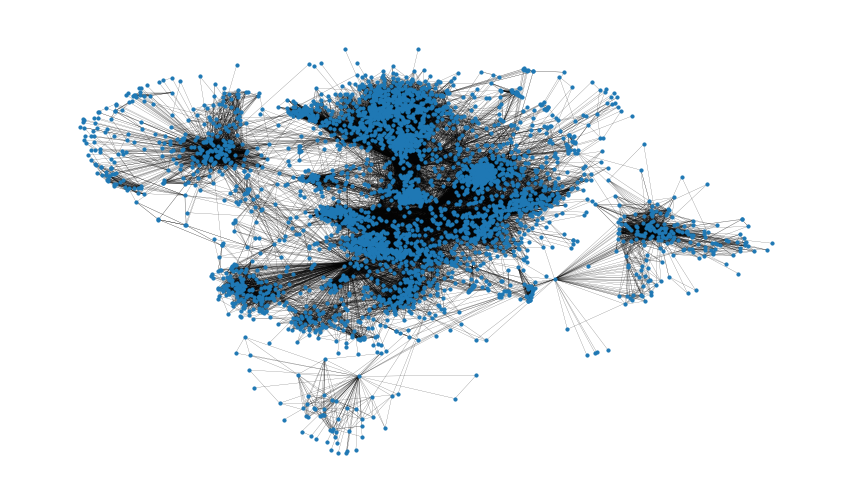

In [28]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15,9))
ax.axis('off')
plot_options = {"node_size": 10, "with_labels":False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## 그래프 형상(topological attributes) 분석

In [29]:
print("Nodes : ", G.number_of_nodes())

Nodes :  4039


In [30]:
print("Edges : ", G.number_of_edges())

Edges :  88234


In [31]:
shortest_path_lengths=dict(nx.all_pairs_shortest_path_length(G))
diameter=max(nx.eccentricity(G,sp=shortest_path_lengths).values())
diameter

8

In [32]:
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
np.mean(average_path_lengths)

3.691592636562027

In [33]:
path_lengths = np.zeros(diameter + 1, dtype=int)
path_lengths

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Frequency (%)')

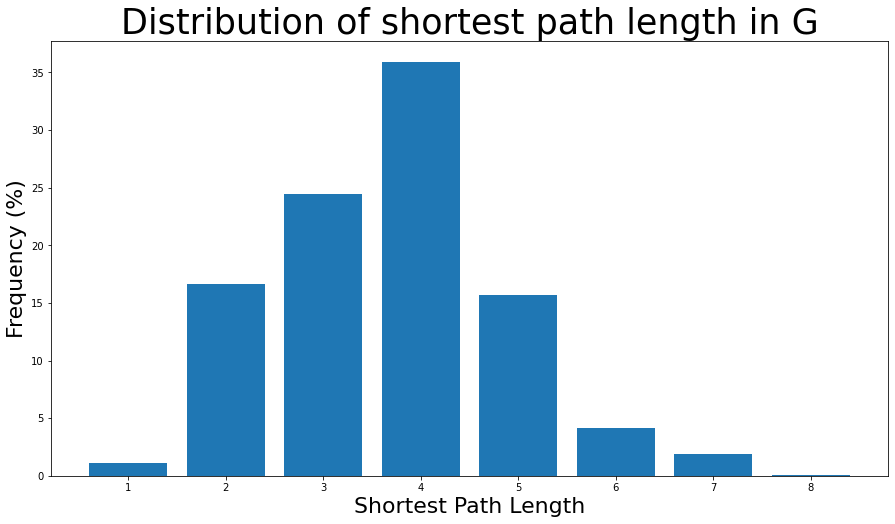

In [34]:
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts 

freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})

In [35]:
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

In [36]:
t_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:8]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566),
 ('Jaime-Lannister', 0.10083800602581632),
 ('Cersei-Lannister', 0.08870426655860289),
 ('Arya-Stark', 0.08724236063571153)]

In [37]:
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:8]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739)]

In [38]:
eigen_cen = nx.eigenvector_centrality(G)
sorted(eigen_cen.items(), key=lambda x:x[1], reverse=True)[0:8]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886553),
 (2206, 0.08605239270584343),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991796),
 (2218, 0.08415573568055032),
 (2078, 0.08413617041724979)]

Checking the results:

- 1912 노드는 높은 고유벡터중심성을 가짐. 네트워크에 이 노드가 전반적인 영향력 면에서 매우 중요한 노드. 연결중심성, 매개중심성이 모두 높은 노드로, 'popular & influencious'
- 나머지 노드들은 다른 중심성 지표는 높지 않으나 고유벡터중심성은 높음. 그 이유로 이들 노드들이 모두 1912 노드와 연결되어 있을 가능성이 있음.